<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9043-CDNA-20203/blob/main/regressao_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

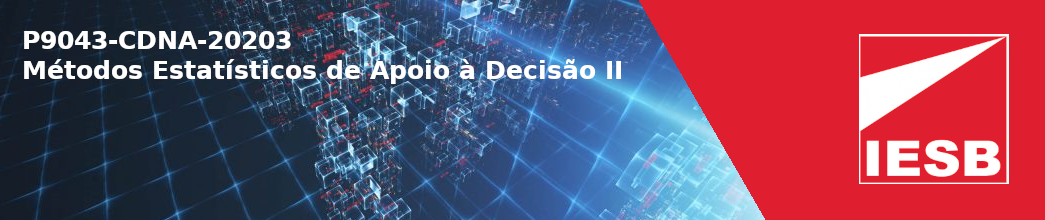

In [31]:
from IPython.display import Image
Image('/content/sample_data/banner_iesb_pos_colab_meadii.png')

## Regressão e Classificação

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Qualidade do vinho - Modelo de Regressão

In [39]:
# Importando a base
df_vinho = pd.read_csv('/content/sample_data/winequality-red.csv')

df_vinho.shape

(1599, 12)

In [41]:
# Visualizando os dados
df_vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
# Conferindo os tipos e quantidades
df_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
# Selecionando as colunas para treinamento
feats = [c for c in df_vinho.columns if c not in ['quality']]

In [44]:
# Separando o dataframe
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_vinho, random_state = 42)

train.shape, test.shape

((1199, 12), (400, 12))

In [45]:
# Treinando um modelo de RF Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

rf.fit(train[feats], train['quality'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [46]:
# Fazendo previsões com o modelo treinado
preds = rf.predict(test[feats])

preds

array([5.35 , 5.14 , 5.49 , 5.265, 5.99 , 5.045, 5.07 , 4.89 , 6.15 ,
       5.98 , 6.825, 5.31 , 5.83 , 5.285, 5.515, 6.47 , 5.315, 5.815,
       6.78 , 5.095, 4.91 , 5.785, 5.455, 6.095, 5.585, 6.015, 6.42 ,
       5.255, 5.22 , 5.995, 5.33 , 5.37 , 5.9  , 5.48 , 5.5  , 5.095,
       6.335, 6.025, 5.455, 6.21 , 5.095, 5.2  , 6.23 , 5.13 , 5.495,
       5.665, 6.395, 5.575, 5.085, 5.67 , 5.075, 5.26 , 5.555, 7.005,
       5.22 , 5.14 , 6.045, 5.92 , 5.48 , 5.025, 5.72 , 6.14 , 5.585,
       5.305, 6.805, 5.37 , 6.78 , 5.64 , 6.55 , 5.435, 6.1  , 5.265,
       5.785, 5.605, 6.15 , 5.07 , 6.49 , 5.195, 5.87 , 6.56 , 5.155,
       6.81 , 5.15 , 5.64 , 5.73 , 6.63 , 5.055, 6.02 , 6.325, 5.435,
       6.495, 5.555, 5.285, 5.265, 5.195, 5.505, 5.195, 5.905, 4.53 ,
       5.49 , 4.955, 5.085, 5.705, 6.47 , 5.47 , 6.635, 5.825, 5.3  ,
       5.355, 5.195, 6.445, 5.02 , 6.43 , 5.03 , 5.255, 6.005, 5.57 ,
       5.205, 5.1  , 5.815, 6.245, 5.83 , 5.715, 5.325, 5.735, 5.25 ,
       6.415, 5.415,

In [47]:
# Visualizar os 5 últimos registros da base de teste
test.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1565,6.7,0.67,0.02,1.9,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,6
327,10.3,0.44,0.50,4.5,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,5
254,7.1,0.60,0.00,1.8,0.074,16.0,34.0,0.99720,3.47,0.70,9.9,6
322,7.8,0.62,0.05,2.3,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,5
1160,10.6,0.36,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7


In [48]:
# Verificando o desempenho de acordo com a métrica
from sklearn.metrics import mean_squared_error

mean_squared_error(test['quality'], preds)

0.31123649999999997

In [49]:
# Avaliando o desempenho do modelo em cima de dados conhecidos (dados de treino)
preds_train = rf.predict(train[feats])

mean_squared_error(train['quality'], preds_train)

0.04819537114261885

## Doenças cardiovasculares - Modelo de classificação binária

In [50]:
# Importando a base
df_cardio = pd.read_csv('/content/sample_data/cardio_train.csv', sep=';')

df_cardio.shape

(70000, 13)

In [51]:
# Visualizando os dados
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [53]:
# Selecionando as colunas para treinamento
feats = [c for c in df_cardio.columns if c not in ['id', 'cardio']]
feats

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [54]:
# Separando o dataframe
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_cardio, random_state = 42, test_size=0.1)

train, valid = train_test_split(train, random_state = 42, test_size=0.1)

train.shape, valid.shape, test.shape

((56700, 13), (6300, 13), (7000, 13))

In [55]:
# Treinando um modelo de RF Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

rf.fit(train[feats], train['cardio'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
# Fazendo previsões com o modelo treinado na base de validação
preds_val = rf.predict(valid[feats])

preds_val

array([1, 0, 0, ..., 1, 1, 0])

In [57]:
# Visualizando os 3 primeiros registros da base de validação
valid.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
34622,49454,21960,2,175,86.0,140,90,3,1,1,1,0,0
59311,84688,18859,1,160,59.0,120,80,3,1,0,0,1,1
10918,15620,15463,2,174,69.0,120,80,1,1,0,0,1,0


In [58]:
# Visualizando os 3 últimos registros da base de validação
valid.tail(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35717,51009,15991,1,163,80.0,140,90,1,1,1,0,1,1
64979,92744,19643,2,178,93.0,160,110,1,1,0,0,1,1
50094,71495,17703,2,164,61.0,110,70,1,1,0,0,1,0


In [59]:
# Verificando o desempenho de acordo com a métrica - base de validação
from sklearn.metrics import accuracy_score

accuracy_score(valid['cardio'], preds_val)

0.7139682539682539

In [60]:
# Vamos verificar qual o valor de base para a coluna target da base de validação
valid['cardio'].value_counts(normalize=True)

1    0.505873
0    0.494127
Name: cardio, dtype: float64

In [61]:
# Fazendo previsões com o modelo treinado na base de teste
preds_test = rf.predict(test[feats])

preds_test

array([1, 1, 1, ..., 0, 0, 1])

In [62]:
# Verificando o desempenho de acordo com a métrica - base de teste
accuracy_score(test['cardio'], preds_test)

0.7207142857142858

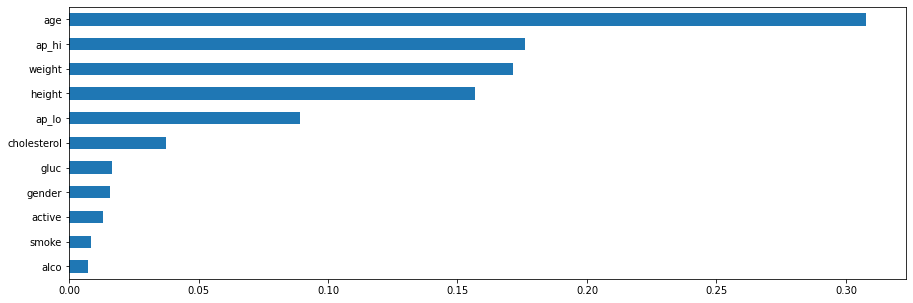

In [63]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15, 5))

# Avaliando a importancia de cada coluna (cada variável de entrada)
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

In [71]:
pip install scikit-plot

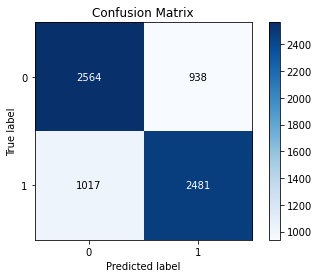

In [73]:
# importando a bilbioteca para plotar o gráfico de Matriz de Confusão
import scikitplot as skplt

# Matriz de Confusão - Dados de Teste
skplt.metrics.plot_confusion_matrix(test['cardio'], preds_test)